<a href="https://colab.research.google.com/github/uditsaini1111/decisiontree_rf/blob/main/winedata_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [5]:
df.shape

(1143, 12)

In [6]:
a = df.corr()
a = a[(a>0.85) & (a!=1)]
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

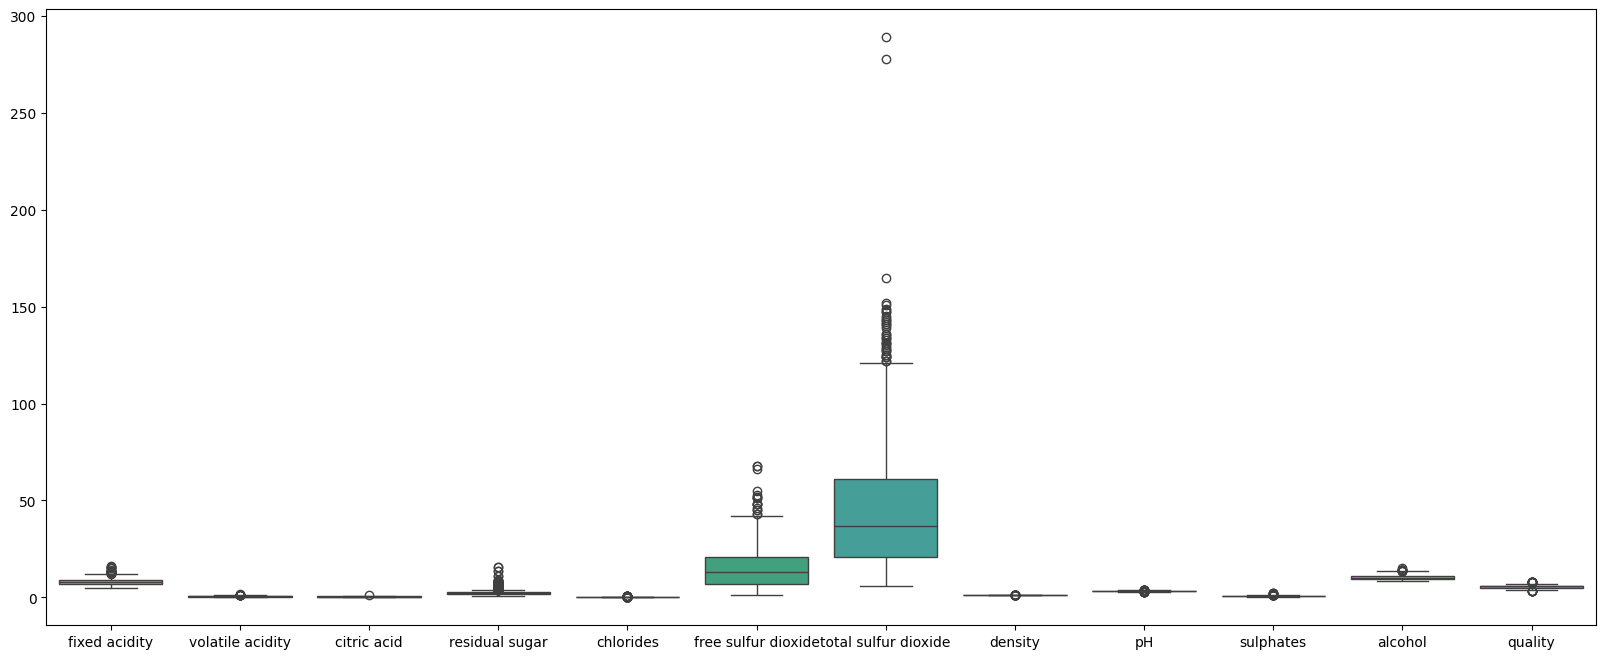

In [7]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = df)

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
for i in x.columns:
  Q1 = x[i].quantile(0.25)
  Q3 = x[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (x[i] >= lower_bound) & (x[i] <= upper_bound)

In [11]:
x_1=x[mask]
y_1=y[mask]

In [12]:
x_1.shape

(1131, 11)

<Axes: >

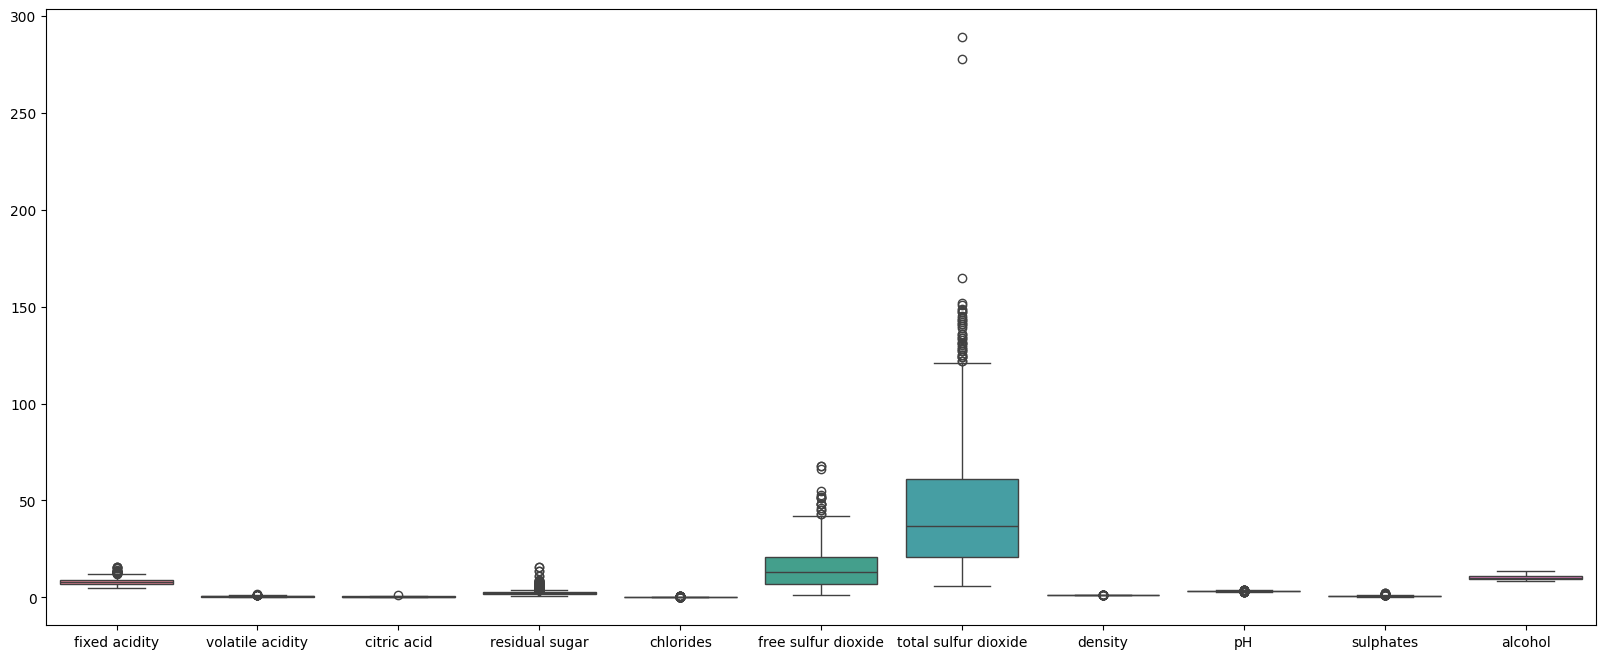

In [13]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_1)

In [14]:
x_2=x_1[(x_1['total sulfur dioxide'])<(x_1['total sulfur dioxide'].quantile(.98))]
y_2=y_1[(x_1['total sulfur dioxide'])<(x_1['total sulfur dioxide'].quantile(.98))]

In [15]:
x_2.shape

(1108, 11)

<Axes: >

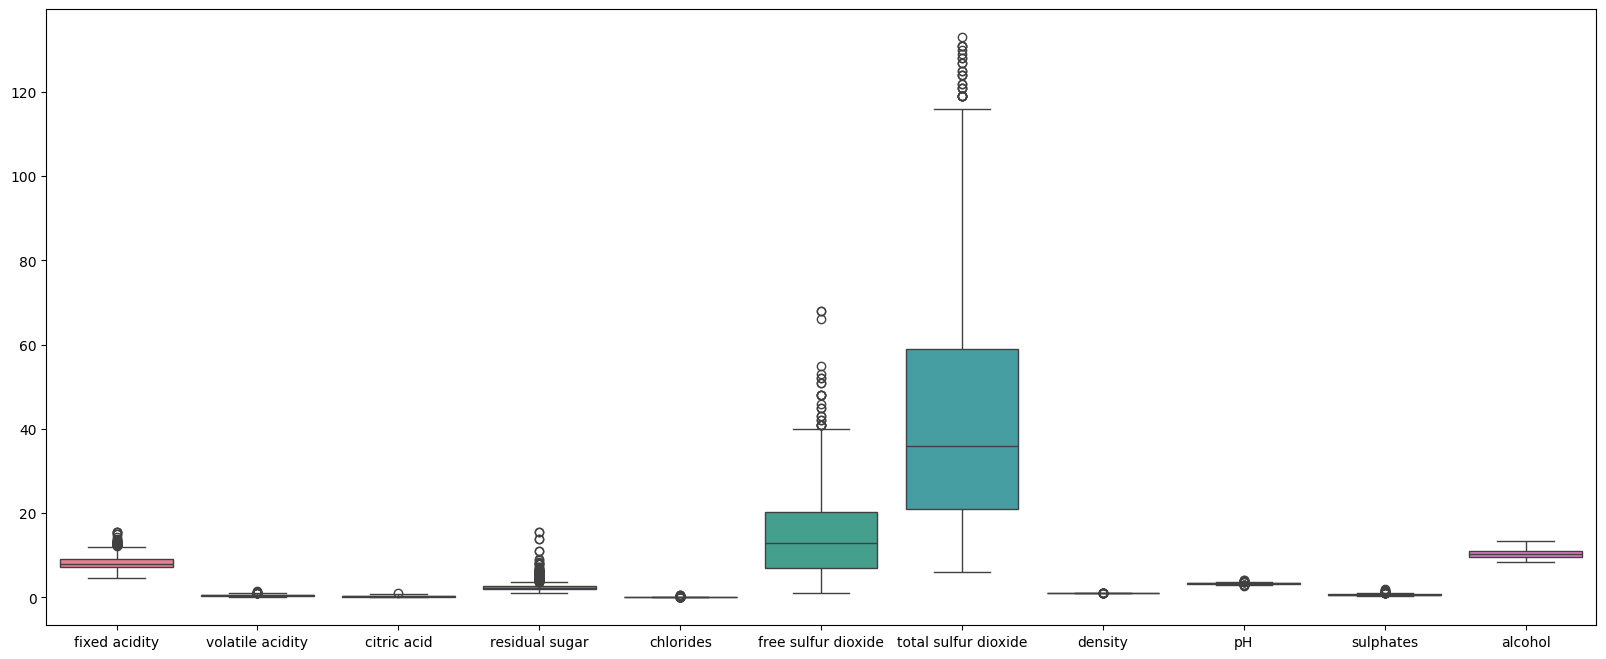

In [16]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_2)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_1=scaler.fit_transform(x_train)
x_test_1=scaler.transform(x_test)

<Axes: >

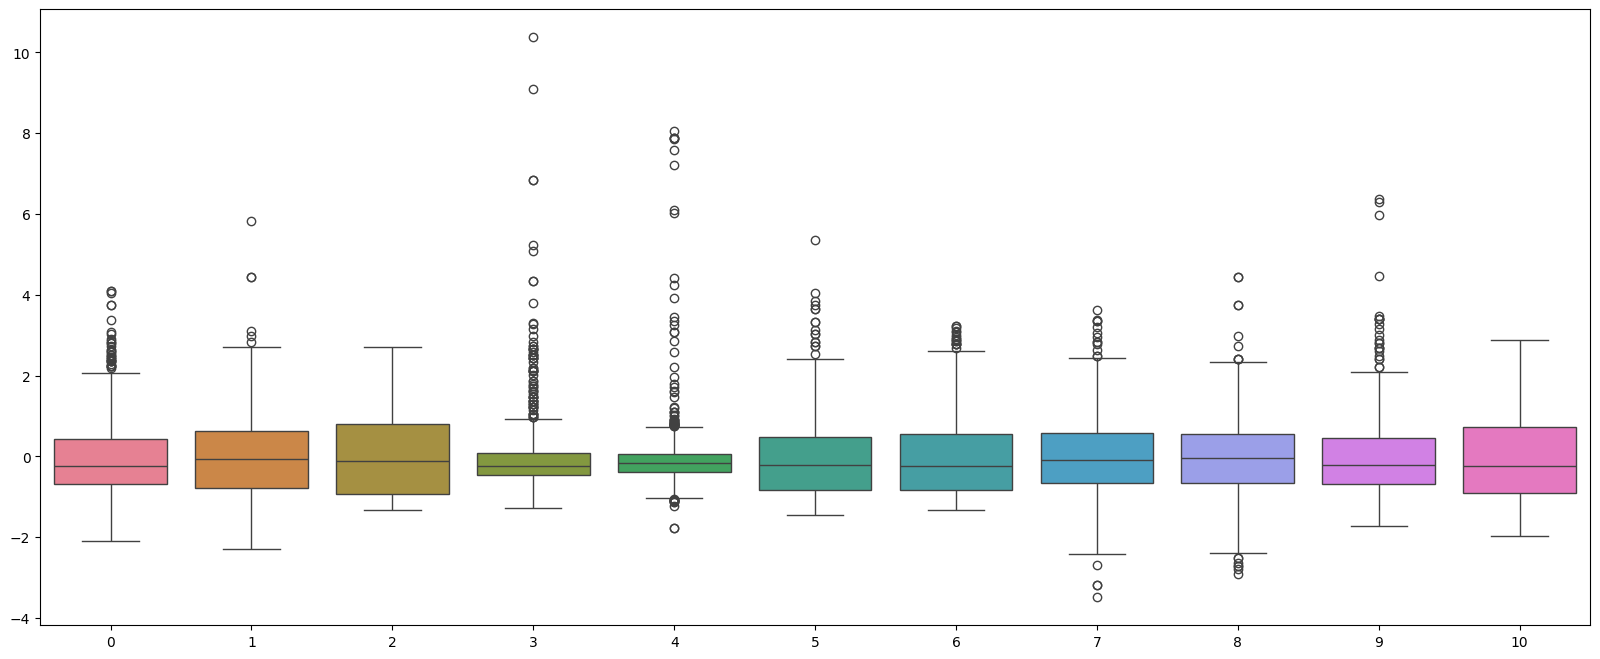

In [19]:
fig= plt.subplots(figsize=(20,8))
sns.boxplot(data = x_train_1)

In [23]:
y_train.value_counts()

,count
quality,
6,330
5,322
7,91
4,19
8,8
3,5


In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)
x_train_2, y_train_2 = smote.fit_resample(x_train_1, y_train)

In [28]:
y_train_2.value_counts()

,count
quality,
6,330
5,330
7,330
8,330
4,330
3,330


In [29]:
from sklearn.svm import SVC
m1=SVC()
m1.fit(x_train_2,y_train_2)

SVC()

In [30]:
p1=m1.predict(x_test_1)

In [31]:
p1

array([6, 7, 5, 6, 6, 6, 5, 6, 7, 6, 3, 7, 6, 6, 5, 6, 6, 7, 7, 5, 3, 5,
       6, 5, 6, 5, 6, 7, 6, 5, 5, 7, 6, 6, 5, 6, 6, 4, 5, 6, 5, 7, 6, 5,
       7, 5, 4, 6, 3, 5, 3, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 4, 5, 5, 5,
       5, 6, 5, 6, 7, 6, 6, 4, 6, 5, 6, 5, 4, 7, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 3, 5, 4, 5, 5, 6, 5, 7, 7, 5, 4, 5, 5, 5, 8, 5, 6, 6, 5, 5,
       4, 5, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 4, 6, 5, 5, 4, 6, 7, 5, 5, 5,
       8, 6, 4, 6, 6, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 5, 6, 6, 3, 6, 6, 3,
       4, 7, 5, 7, 7, 5, 4, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5,
       5, 5, 4, 5, 7, 6, 3, 7, 6, 5, 5, 6, 5, 7, 5, 6, 5, 5, 7, 5, 3, 5,
       5, 7, 5, 5, 4, 5, 6, 5, 7, 5, 5, 5, 6, 5, 7, 6, 6, 7, 5, 5, 6, 7,
       6, 5, 6, 6, 7, 5, 5, 6, 5, 4, 5, 6, 6, 6, 5, 5, 6, 5, 8, 5, 4, 7,
       5, 6, 5, 5, 7, 7, 6, 6, 5, 5, 6, 6, 5, 6, 4, 5, 6, 5, 5, 6, 5, 7,
       7, 5, 5, 6, 5, 5, 4, 6, 6, 6, 5, 4, 6, 6, 5, 5, 5, 5, 4, 5, 6, 6,
       8, 5, 5, 4, 8, 7, 6, 7, 5, 5, 6, 5, 7, 7, 6,

In [32]:
param_grid =  {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [36]:
param_distributions =  {
    'C': range(1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': range(2, 4)
}

In [33]:
from sklearn.model_selection import GridSearchCV
para=GridSearchCV(m1, param_grid, cv=10, n_jobs=-1, verbose=1)
para.fit(x_train_2, y_train_2)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
para2=RandomizedSearchCV(m1, param_distributions, n_iter=30, cv=10, n_jobs=-1, verbose=1)
para2.fit(x_train_2, y_train_2)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': range(1, 10),
                                        'degree': range(2, 4),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   verbose=1)

In [38]:
para.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [39]:
para2.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 8}

In [41]:
m2=SVC(C=10, degree=2, gamma='scale', kernel='rbf')
m2.fit(x_train_2,y_train_2)

SVC(C=10, degree=2)

In [42]:
m3=SVC(kernel= 'rbf', gamma='auto', degree=3, C= 8)
m3.fit(x_train_2,y_train_2)

SVC(C=8, gamma='auto')

In [43]:
p2=m2.predict(x_test_1)
p3=m3.predict(x_test_1)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.21      0.15        14
           5       0.65      0.63      0.64       144
           6       0.51      0.43      0.47       122
           7       0.54      0.56      0.55        45
           8       0.17      0.14      0.15         7

    accuracy                           0.52       333
   macro avg       0.33      0.33      0.33       333
weighted avg       0.55      0.52      0.53       333



In [46]:
print(classification_report(y_test, p2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.14      0.15        14
           5       0.66      0.67      0.67       144
           6       0.50      0.51      0.50       122
           7       0.55      0.51      0.53        45
           8       0.00      0.00      0.00         7

    accuracy                           0.55       333
   macro avg       0.31      0.31      0.31       333
weighted avg       0.55      0.55      0.55       333



In [47]:
print(classification_report(y_test, p3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.15      0.14      0.15        14
           5       0.67      0.67      0.67       144
           6       0.51      0.51      0.51       122
           7       0.55      0.53      0.54        45
           8       0.00      0.00      0.00         7

    accuracy                           0.56       333
   macro avg       0.31      0.31      0.31       333
weighted avg       0.56      0.56      0.56       333

